# Analysis of Deecntralised Iterative Auction Task Mutation

In [2]:
from __future__ import annotations

import os
import sys
sys.path.append(os.path.join(os.getcwd(), ".."))

import json
from typing import List

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src.extra.io import save_plot

matplotlib.rcParams['font.family'] = "monospace"
%matplotlib inline

## Random Mutation

In [2]:
results_filename = '../data/task_mutation_paper_r_t30_s6_dt07-17_23-19-03.json'

with open(results_filename) as file:
    results_data = json.load(file)

In [3]:
def allocated(was_allocated, is_allocated):
    return sum(result["task allocated"] == was_allocated and result["mutant task allocated"] == is_allocated 
               for mutation_results in results_data for name, result in mutation_results.items() 
               if name != "no mutation" and name != "model")

print(f'Was allocated | Is Allocated | total ')
print(f'    True      |     True     |   {allocated(True, True)}')
print(f'    False     |     True     |   {allocated(False, True)}')
print(f'    True      |     False    |   {allocated(True, False)}')
print(f'    False     |     False    |   {allocated(False, False)}')

Was allocated | Is Allocated | total 
    True      |     True     |   0
    False     |     True     |   0
    True      |     False    |   198
    False     |     False    |   87


## Grid Search

In [27]:
grid_search_filenames = [
    # 'mutation_grid_search_paper_r0_t30_s6_dt07-26_08-10-07', 
    'mutation_grid_search_paper_r0_t30_s6_dt07-30_12-08-50',
    'mutation_grid_search_paper_r1_t30_s6_dt07-30_12-08-50',
    'mutation_grid_search_paper_r2_t30_s6_dt07-30_12-10-18',
    # 'mutation_grid_search_paper_r3_t30_s6_dt07-26_08-15-15',
    'mutation_grid_search_paper_r3_t30_s6_dt07-30_12-10-18'
]

In [28]:
for results_filename in grid_search_filenames:
    with open(f'../data/{results_filename}.json') as file:
        results_data = json.load(file)
    print(results_filename)
    mutant_task = results_data['Mutation 0']['mutated task']
    # print(", ".join([task['name'] for task in results_data['model']['tasks']]))
    # print(results_data['no mutation']['task prices'])
    original_price = results_data['no mutation']['task prices'][mutant_task]
    print(f'Allocations: {sum(results["allocated"] for name, results in results_data.items() if name != "model" and name != "no mutation")}, '
          f'Better price: {sum(results["allocated"] and results["task price"] < original_price for name, results in results_data.items() if name != "model" and name != "no mutation")}, '
          f'Total: {len(results_data)-2}')

mutation_grid_search_paper_r0_t30_s6_dt07-30_12-08-50
Allocations: 720, Better price: 269, Total: 720
mutation_grid_search_paper_r1_t30_s6_dt07-30_12-08-50
Allocations: 1320, Better price: 0, Total: 1320
mutation_grid_search_paper_r2_t30_s6_dt07-30_12-10-18
Allocations: 1170, Better price: 348, Total: 1170
mutation_grid_search_paper_r3_t30_s6_dt07-30_12-10-18
Allocations: 1098, Better price: 0, Total: 1098


36
36
36
33
Save file location: figs/mutation/eps/grid search.eps
Save file location: figs/mutation/png/grid search.png
Save file location: figs/mutation/pdf/grid search.pdf


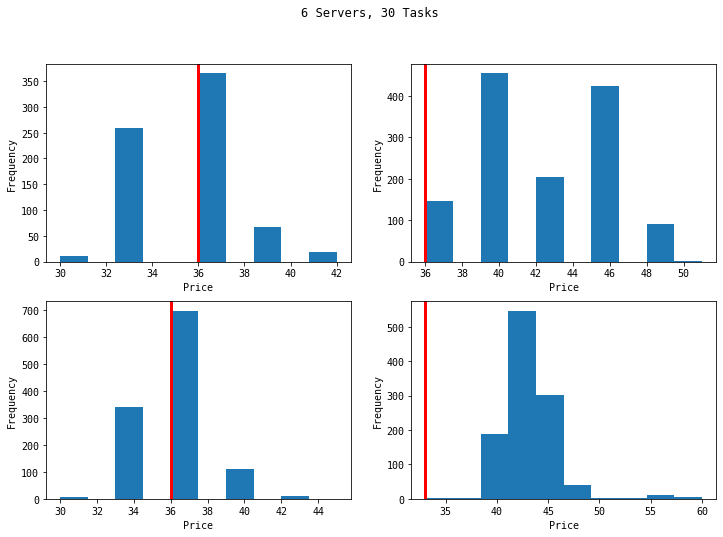

In [43]:
_, gs_ax = plt.subplots(2, 2, figsize=(12, 8))
gs_ax = gs_ax.flatten()

for ax, filename in zip(gs_ax, grid_search_filenames):
    with open(f'../data/{filename}.json') as file:
        results_data = json.load(file)
        
        prices = [results['task price'] for name, results in results_data.items() if name != "model" and name != "no mutation"]
        ax.hist(prices, bins=10)
        
        mutant_task = results_data['Mutation 0']['mutated task']
        original_price = results_data['no mutation']['task prices'][mutant_task]
        print(original_price)
        ax.axvline(x=original_price, color='red', linewidth=3)
        
        ax.set_xlabel('Price')
        ax.set_ylabel('Frequency')
plt.suptitle('6 Servers, 30 Tasks')
save_plot('grid search', 'mutation')

## Value only Mutation

In [ ]:
results_filename = '../data/task_mutation_paper_r_t30_s6_dt07-17_23-19-03.json'

with open(results_filename) as file:
    results_data = json.load(file)

In [ ]:
print(f'Was allocated | -1 value | -2 value | -3 value | -4 value')
for results in results_data:
    for name, result in results.items():
        if name != 'model' and name != 'no mutation':
            pass

In [6]:
for pos, mutation_results in enumerate(results_data):
    for name, result in mutation_results.items():
        if name != "no mutation" and name != "model":
            if result['mutant price'] < result['task price'] and result['mutant task allocated'] == True:
                print(f'Result: {pos}, Mutant task name: {result["mutant task name"]}, '
                      f'Original price: {result["task price"]}, Mutant task price: {result["mutant price"]}')

In [7]:
was_allocated_results = [
    result 
    for mutation_results in results_data for name, result in mutation_results.items() 
    if name != "no mutation" and name != "model" and result["task allocated"]
]